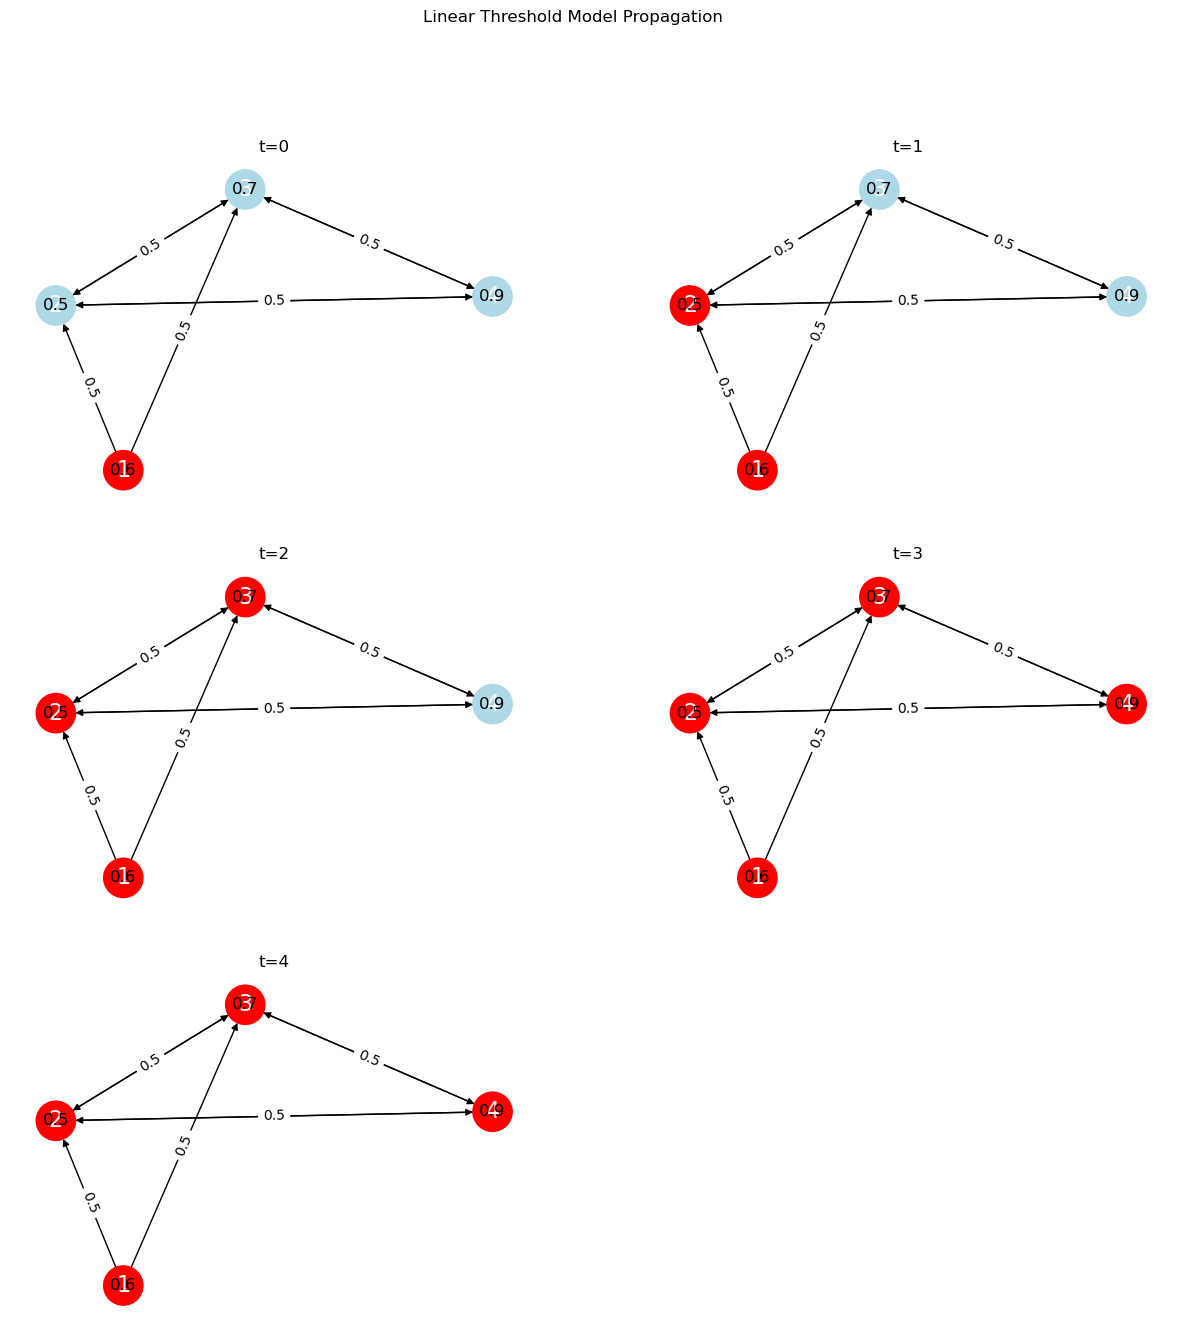

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

def initialize_graph():
    G = nx.DiGraph()
    G.add_edges_from([
        (1, 2), (1, 3), (2, 4), (3, 4), (2, 3), (3, 2), (4, 2), (4, 3)
    ])
    return G

def set_thresholds():
    return {1: 0.6, 2: 0.5, 3: 0.7, 4: 0.9}

def set_edge_weights():
    return {(1, 2): 0.5, (1, 3): 0.5, (2, 4): 0.5, (3, 4): 0.5, (2, 3): 0.5, 
            (3, 2): 0.5, (4, 2): 0.5, (4, 3): 0.5}

def linear_threshold_model(G, thresholds, edge_weights, initial_activated):
    activated = set(initial_activated)
    newly_activated = set(initial_activated)
    states = [activated.copy()]

    while newly_activated:
        new_activations = set()
        for node in G.nodes():
            if node not in activated:
                neighbors = list(G.predecessors(node))
                influence = sum(edge_weights[(neighbor, node)] for neighbor in neighbors if neighbor in activated)
                if influence >= thresholds[node]:
                    new_activations.add(node)
        newly_activated = new_activations
        activated.update(new_activations)
        states.append(activated.copy())
    return states

def visualize_graph(G, states, thresholds, edge_weights):
    pos = nx.spring_layout(G)
    num_states = len(states)
    cols = 2
    rows = math.ceil(num_states / cols)
    plt.figure(figsize=(15, 5 * rows))

    for t, activated in enumerate(states):
        plt.subplot(rows, cols, t+1)
        node_colors = ['red' if node in activated else 'lightblue' for node in G.nodes()]
        nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=16, font_color='white')
        
        edge_labels = {edge: f'{weight}' for edge, weight in edge_weights.items()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')
        
        threshold_labels = {node: f'{thresholds[node]}' for node in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels=threshold_labels, font_color='black')
        
        plt.title(f't={t}')
    plt.suptitle('Linear Threshold Model Propagation')
    plt.show()

# Main script
G = initialize_graph()
thresholds = set_thresholds()
edge_weights = set_edge_weights()
initial_activated = [1]  # Starting with node 1 as initially activated
states = linear_threshold_model(G, thresholds, edge_weights, initial_activated)
visualize_graph(G, states, thresholds, edge_weights)


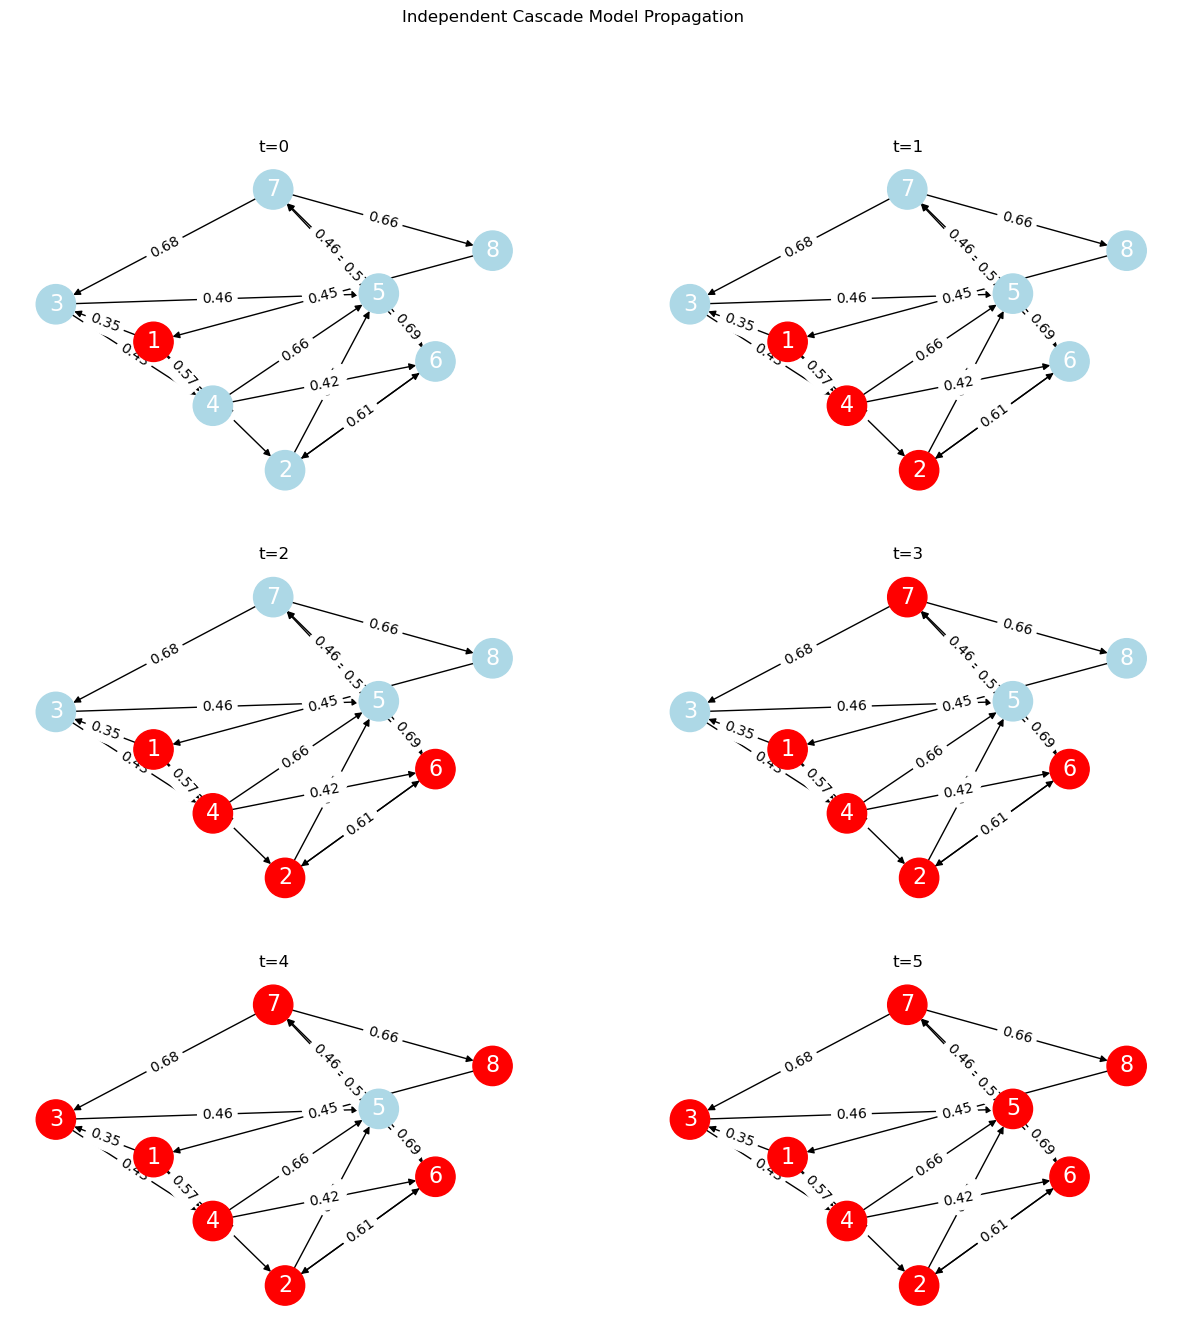

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

def initialize_graph():
    G = nx.DiGraph()
    edges = [
        (1, 2), (1, 3), (1, 4), (2, 5), (3, 5), (4, 6), (5, 7), 
        (6, 7), (7, 8), (2, 6), (3, 4), (4, 5), (5, 6), (6, 2),
        (7, 3), (8, 1)
    ]
    G.add_edges_from(edges)
    return G

def set_edge_weights(G):
    edge_weights = {}
    for edge in G.edges():
        edge_weights[edge] = random.uniform(0.3, 0.8)  # 随机设置每条边的权重
    return edge_weights

def independent_cascade_model(G, edge_weights, initial_activated):
    activated = set(initial_activated)
    newly_activated = set(initial_activated)
    states = [activated.copy()]

    while newly_activated:
        new_activations = set()
        for node in newly_activated:
            neighbors = list(G.successors(node))
            for neighbor in neighbors:
                if neighbor not in activated and random.random() < edge_weights[(node, neighbor)]:
                    new_activations.add(neighbor)
        newly_activated = new_activations
        activated.update(new_activations)
        if newly_activated:
            states.append(activated.copy())
    return states

def visualize_graph(G, states, edge_weights):
    pos = nx.spring_layout(G)
    num_states = len(states)
    cols = 2
    rows = math.ceil(num_states / cols)
    plt.figure(figsize=(15, 5 * rows))

    for t, activated in enumerate(states):
        plt.subplot(rows, cols, t+1)
        node_colors = ['red' if node in activated else 'lightblue' for node in G.nodes()]
        nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=16, font_color='white')
        
        edge_labels = {edge: f'{weight:.2f}' for edge, weight in edge_weights.items()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')
        
        plt.title(f't={t}')
    plt.suptitle('Independent Cascade Model Propagation')
    plt.show()

# Main script
G = initialize_graph()
edge_weights = set_edge_weights(G)
initial_activated = [1]  # Starting with node 1 as initially activated
states = independent_cascade_model(G, edge_weights, initial_activated)
visualize_graph(G, states, edge_weights)
